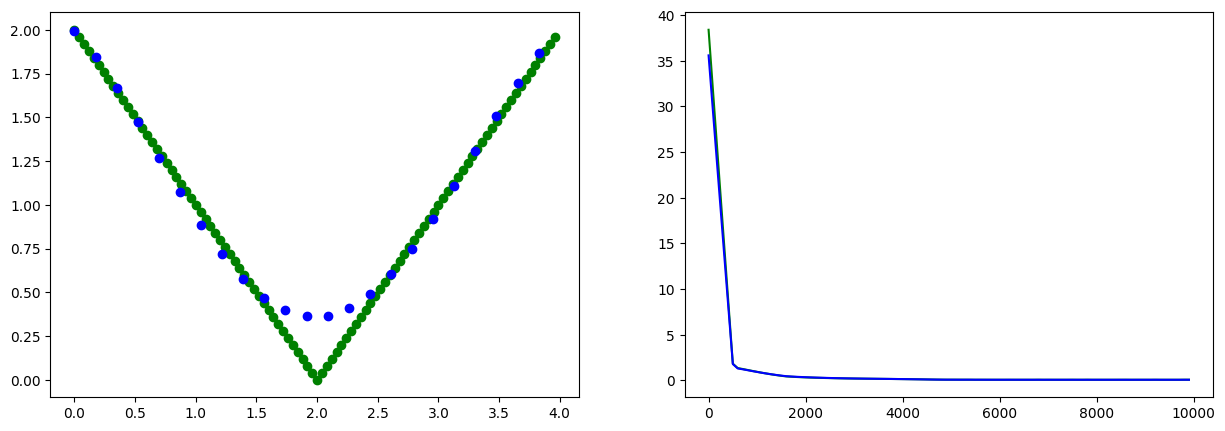

Epoch: 0 | train loss: 38.398144 | test loss: 35.592903
Epoch: 100 | train loss: 31.051058 | test loss: 28.797119
Epoch: 200 | train loss: 23.713911 | test loss: 22.01729
Epoch: 300 | train loss: 16.390953 | test loss: 15.24245
Epoch: 400 | train loss: 9.088149 | test loss: 8.497607
Epoch: 500 | train loss: 1.821789 | test loss: 1.783771
Epoch: 600 | train loss: 1.346922 | test loss: 1.30577
Epoch: 700 | train loss: 1.244321 | test loss: 1.212875
Epoch: 800 | train loss: 1.139201 | test loss: 1.114694
Epoch: 900 | train loss: 1.034291 | test loss: 1.01486
Epoch: 1000 | train loss: 0.931093 | test loss: 0.920913
Epoch: 1100 | train loss: 0.831504 | test loss: 0.825532
Epoch: 1200 | train loss: 0.737241 | test loss: 0.741013
Epoch: 1300 | train loss: 0.649741 | test loss: 0.657608
Epoch: 1400 | train loss: 0.56906 | test loss: 0.585066
Epoch: 1500 | train loss: 0.494808 | test loss: 0.514299
Epoch: 1600 | train loss: 0.428716 | test loss: 0.455053
Epoch: 1700 | train loss: 0.397123 | tes

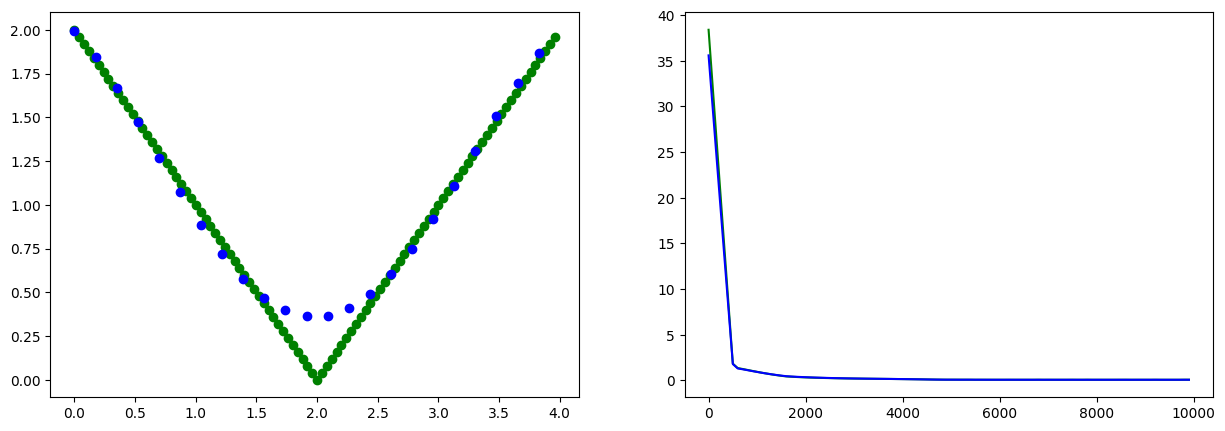

In [10]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

def dataset(n=100):
    xs = []
    ys = []
    for i in range(n):
        x = i * 4 / n
        xs.append(x)
        #ys.append(math.sin(x))
        #ys.append(x)
        ys.append(abs(x - 2))
    return torch.tensor(xs), torch.tensor(ys)

def plot(once, fig, hdisplay, ax1, ax2, xs_train, ys_train, xs_test, ys_test, epochs, train_losses, test_losses):    
    ax1.clear()
    ax2.clear()
    if once:
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_title('inference')
        ax1.title.set_fontsize(9)
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.set_title('Training Loss')
        ax1.scatter(xs_train, ys_train, c='g', label='Training Data')
        ax1.scatter(xs_test, ys_test, c='b', label='Result')
        ax2.plot(epochs, train_losses, c='g', label='Training Loss')
        ax2.plot(epochs, test_losses, c='b', label='Test Loss')
    else:
        ax1.scatter(xs_train, ys_train, c='g', label='Training Data')
        ax1.scatter(xs_test, ys_test, c='b', label='Result')
        ax2.plot(epochs, train_losses, c='g', label='Training Loss')
        ax2.plot(epochs, test_losses, c='b', label='Test Loss')
    hdisplay.update(fig)

class PolynomialRegressionModel(torch.nn.Module):
    def __init__(self, n_powers):
        super().__init__()
        self.n_powers = n_powers
        self.coeffs = torch.nn.Parameter(torch.rand(n_powers, requires_grad=True))
        
    def forward(self, x):
        return torch.sum(torch.mul(torch.pow(x.repeat(self.n_powers, 1), torch.arange(0,self.n_powers).reshape(1,-1).t()), self.coeffs.reshape(1,-1).t()), 0)

# creating dataset
xs_train, ys_train = dataset(100)
xs_test, ys_test = dataset(23)

# creating model
POWERS = 5
torch.manual_seed(42)
model = PolynomialRegressionModel(POWERS)

# creating optimizer
optimizer = torch.optim.Adam(params = model.parameters())

# for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
hdisplay = display("", display_id=True)

# train preparation
loss_fn = torch.nn.L1Loss()
EPOCHS = 10000
epochs = []
train_losses = []
test_losses = []
for epoch in range(EPOCHS):
    # train step
    model.train()
    ys_pred = model(xs_train)
    loss = loss_fn(ys_pred, ys_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # test evaluation
    model.eval()
    with torch.inference_mode():
        test_pred = model(xs_test)
        test_loss = loss_fn(test_pred, ys_test)
        # for plotting
        if epoch % (EPOCHS / 100) == 0:
            epochs.append(epoch)
            train_losses.append(loss.item())
            test_losses.append(test_loss.item())
            plot(epoch == 0, fig, hdisplay, ax1, ax2, xs_train, ys_train, xs_test, test_pred, epochs, train_losses, test_losses)
            print(f'Epoch: {epoch} | train loss: {round(loss.item(), 6)} | test loss: {round(test_loss.item(), 6)}')